# Árboles de decisión

Tenemos un grupo de niños en una clase, y queremos saber si aprobarán o no un examen. Sabemos algunas cosas sobre cada niño que podrían ayudarnos a adivinar si aprobarán: cuántas horas estudiaron, cuántas horas durmieron, cuánto tiempo pasaron en redes sociales, cuántas horas hacen ejercicio, y su edad.

## Paso 1: Preparación de los datos

Imaginemos una base de datos de estudiantes con las siguientes columnas:

* **Horas de estudio**
* **Horas de sueño**
* **Horas en redes sociales**
* **Ejercicio semanal**
* **Edad**
* **Aprobó** La clase a predecir, que es Sí (si aprobó el examen) o No (si no lo aprobó).

In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Generación de datos ficticios
n_samples = 100
horas_estudio = np.random.randint(1, 10, size=n_samples)
horas_sueno = np.random.randint(4, 10, size=n_samples)
horas_redes = np.random.randint(0, 5, size=n_samples)  # Ruido
ejercicio_semanal = np.random.randint(0, 5, size=n_samples)  # Ruido
edad = np.random.randint(15, 30, size=n_samples)  # Ruido

# Generar la columna objetivo con cierta relación con horas de estudio y sueño
aprobado = ((horas_estudio > 5) & (horas_sueno >= 6)).astype(int)

# Crear DataFrame
data = pd.DataFrame({
    'Horas_estudio': horas_estudio,
    'Horas_sueno': horas_sueno,
    'Horas_redes': horas_redes,
    'Ejercicio_semanal': ejercicio_semanal,
    'Edad': edad,
    'Aprobado': aprobado
})

# Separar en X (características) e y (objetivo)
X = data.drop(columns='Aprobado')
y = data['Aprobado']

## Paso 2: Dividir los datos en un conjunto de entrenamiento y uno de prueba

In [8]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Paso 3: Crear el modelo de Árbol de Decisión y sus hiperparámetros

El árbol de decisión funciona dividiendo los datos en pequeños grupos hasta llegar a una decisión. Ahora, vamos a explicar los principales hiperparámetros del modelo de árbol de decisión.

### Los Hiperparámetros del Árbol de Decisión

1. **criterion:** Este hiperparámetro define la forma en que el árbol decide dividir los datos.

* **gini** mide la pureza de los grupos. Si un grupo tiene solo personas que aprobaron o solo personas que reprobaron, tiene una "pureza" de 100%.
* **entropy** mide el "desorden" o confusión en cada grupo, queriendo reducirlo con cada decisión.

En nuestro ejemplo, usaremos ```criterion="gini"``` porque es un criterio popular y fácil de entender.

2. **max_depth:** Este es el límite de cuántos niveles (o profundidad) puede tener el árbol.

Cuanto más profundo es el árbol, más detalles puede aprender, pero también existe el riesgo de que aprenda demasiado los datos (esto se llama sobreajuste).

Para nuestro ejemplo, usaremos ```max_depth=3```.

3. **min_samples_split:** Este hiperparámetro nos indica el número mínimo de muestras que debe tener un grupo para poder dividirse en otros grupos.

Por ejemplo, si ```min_samples_split=2```, significa que si un grupo tiene menos de 2 datos, no puede dividirse más.

En este ejemplo, usaremos ```min_samples_split=2``` (el mínimo permitido).

4. **min_samples_leaf:** Nos indica el mínimo de datos que debe tener un grupo al final del árbol.

Esto evita que los grupos finales tengan muy pocos datos y que el árbol sea demasiado específico.

Usaremos ```min_samples_leaf=1```, permitiendo que el grupo final tenga al menos 1 dato.

5. **max_features:** Este parámetro nos dice cuántas de las características (o columnas) puede considerar el árbol en cada decisión.

Si es None, el árbol considera todas las características.

Usaremos ```max_features=None``` en este caso para permitir que considere todas las características.`

6. **random_state:** Ayuda a hacer el modelo reproducible, es decir, que cada vez que corremos el código, obtengamos el mismo árbol.

Construimos el modelo:

In [9]:
# Crear el modelo
tree = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=3, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features=None, 
    random_state=42
)

## Paso 4: Entrenamiento del Árbol

Entrenamos nuestro árbol con el conjunto de entrenamiento:

In [10]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Paso 6: Realizar Predicciones

Usamos el árbol para hacer predicciones sobre el conjunto de prueba:

In [11]:
y_pred = tree.predict(X_test)

## Paso 7: Evaluación del Modelo

Calculamos la precisión para ver qué tan bien funciona nuestro árbol en los datos de prueba.

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


Al entrenar nuestro árbol de decisión, estamos creando una estructura que simula preguntas que dividen los datos. Cada vez que el árbol decide, hace una pregunta ("¿Esta persona estudió más de X horas?") y sigue dividiendo los datos hasta que termina en una decisión final (grupo puro).

¿Por qué usamos un árbol de decisión?
Porque necesitamos un modelo intuitivo y fácil de interpretar: el árbol de decisión nos permite ver claramente el camino que siguió para tomar una decisión final (Sí o No en este caso). Además, los árboles de decisión suelen funcionar bien en problemas con pocos datos, como este, y donde cada característica (horas de estudio, horas de sueño) ayuda a separar de manera clara a quienes aprobaron y quienes no.

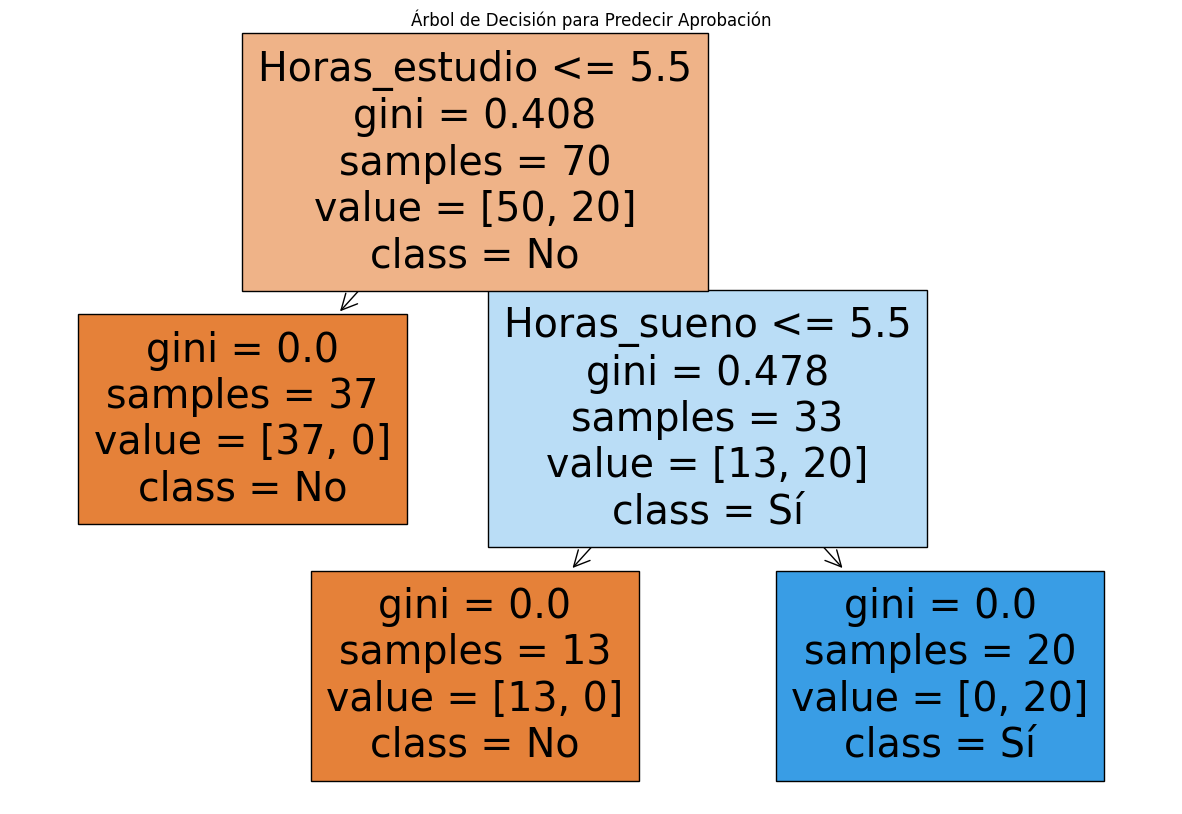

In [15]:
# Visualización del árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(
    tree, 
    feature_names=["Horas_estudio", "Horas_sueno", "Horas_redes", "Ejercicio_semanal", "Edad"], 
    class_names=["No", "Sí"], 
    filled=True
)
plt.title("Árbol de Decisión para Predecir Aprobación")
plt.show()